In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Importing Data

In [2]:
customers=pd.read_csv('Input1_clientes_estructura.csv',sep=';')
sales=pd.read_csv('Input2_clientes_venta.csv',sep=';')
test=pd.read_csv('Input3_clientes_test.csv',sep=';')
products_to_score=pd.read_excel('Product_To_Score.xlsx',sheets='Sheet1') # Products to be include in test

In [3]:
customers.shape

(20921, 6)

In [4]:
customers.describe(include='all')

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
count,20921.000000,20921,20921,20921,20921,20921.000000
unique,NaN,1,11,32,6,NaN
top,NaN,Regional 1,Gerencia_10,Subcanal_3,Categoria_2,NaN
freq,NaN,20921,5441,8217,8773,NaN
mean,10461.000000,NaN,NaN,NaN,NaN,0.397830
std,6039.516827,NaN,NaN,NaN,NaN,0.489462
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,5231.000000,NaN,NaN,NaN,NaN,0.000000
50%,10461.000000,NaN,NaN,NaN,NaN,0.000000
75%,15691.000000,NaN,NaN,NaN,NaN,1.000000


In [5]:
sales.shape

(1406116, 10)

In [6]:
sales.describe(include='all')

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr
count,1.406116e+06,1.406116e+06,1.406116e+06,1406116,1406116,1406116,1406116,1.406116e+06,1.406116e+06,1.406116e+06
unique,NaN,NaN,NaN,3,39,5,17,NaN,NaN,NaN
top,NaN,NaN,NaN,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,NaN,NaN,NaN
freq,NaN,NaN,NaN,991679,406526,786172,707919,NaN,NaN,NaN
mean,2.019518e+03,6.865562e+00,8.328064e+03,NaN,NaN,NaN,NaN,2.294363e-01,-1.335855e+02,1.704834e+03
std,4.996729e-01,2.996953e+00,4.906400e+03,NaN,NaN,NaN,NaN,1.395798e+00,1.491833e+03,1.047079e+04
min,2.019000e+03,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,-4.794567e+05,0.000000e+00
25%,2.019000e+03,5.000000e+00,4.148000e+03,NaN,NaN,NaN,NaN,2.173441e-02,-2.877037e+01,1.778085e+02
50%,2.020000e+03,7.000000e+00,8.097000e+03,NaN,NaN,NaN,NaN,5.268947e-02,0.000000e+00,4.233184e+02
75%,2.020000e+03,9.000000e+00,1.231800e+04,NaN,NaN,NaN,NaN,1.496381e-01,0.000000e+00,1.117963e+03


In [7]:
sales['NR/Vol']=sales['nr']/sales['Volumen']
sales['NR/Vol']=sales['NR/Vol'].fillna(0)

In [8]:
test.shape

(9302, 6)

In [9]:
test.describe(include='all')

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
count,9302.000000,0.0,0.0,0.0,0.0,0.0
mean,9837.522038,NaN,NaN,NaN,NaN,NaN
std,5623.122776,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4886.000000,NaN,NaN,NaN,NaN,NaN
50%,9668.500000,NaN,NaN,NaN,NaN,NaN
75%,14566.750000,NaN,NaN,NaN,NaN,NaN
max,20569.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
products_to_score.head()

,ID,Marca2,Cupo2,CapacidadEnvase
0,1,Marca_20,Cupo_3,CapacidadEnvase_9
1,2,Marca_16,Cupo_2,CapacidadEnvase_10
2,3,Marca_9,Cupo_3,CapacidadEnvase_12
3,4,Marca_38,Cupo_2,CapacidadEnvase_10
4,5,Marca_39,Cupo_2,CapacidadEnvase_10


# 2) Master Data

## Products

In [11]:
products=sales.groupby(['Marca2','Cupo2','CapacidadEnvase2','SegmentoPrecio2'],as_index=False)['Volumen'].sum()

In [12]:
products.shape

(105, 5)

In [13]:
products=products.reset_index()

In [14]:
products.columns

Index(['index', 'Marca2', 'Cupo2', 'CapacidadEnvase2', 'SegmentoPrecio2',
       'Volumen'],
      dtype='object')

In [15]:
products.columns=['product_id', 'Marca2', 'Cupo2', 'CapacidadEnvase2', 'SegmentoPrecio2',
       'Volumen']

In [16]:
products=products.drop('Volumen',axis=1)

# 3) Explortory Data Analysis

## Outliers

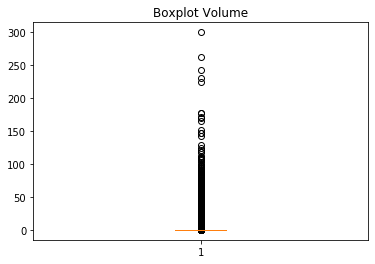

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Volume')
ax1.boxplot(sales['Volumen'])
plt.show()

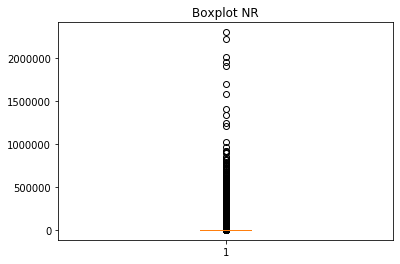

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot NR')
ax1.boxplot(sales['nr'])
plt.show()

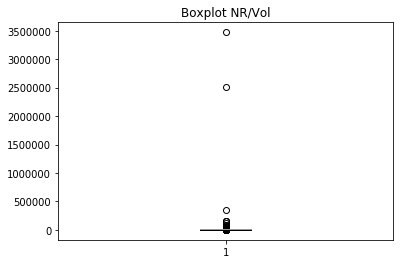

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot NR/Vol')
ax1.boxplot(sales['NR/Vol'])
plt.show()

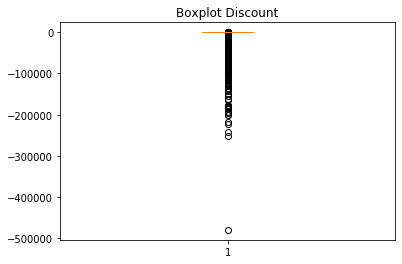

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Discount')
ax1.boxplot(sales['disc'])
plt.show()

In [21]:
# Remove outliers

sales=sales[(sales['Volumen']<200) & (sales['NR/Vol']<2500000) & (sales['disc']>-450000)]

In [22]:
sales.shape

(1406108, 11)

## Sales history

In [23]:
month_sales=sales.groupby(['Año','Mes'],as_index=False)['Volumen','nr'].sum()
month_sales=month_sales.reset_index()

In [24]:
month_sales['NR/Vol']=month_sales['nr']/month_sales['Volumen']

In [25]:
month_sales

,index,Año,Mes,Volumen,nr,NR/Vol
0,0,2019,5,17792.191774,1.282201e+08,7206.540297
1,1,2019,6,19686.564201,1.425519e+08,7241.076245
2,2,2019,7,19593.604638,1.409720e+08,7194.797019
3,3,2019,8,21007.150226,1.521367e+08,7242.138146
4,4,2019,9,20226.404651,1.463797e+08,7237.059864
5,5,2019,10,20346.258446,1.500796e+08,7376.273451
6,6,2019,11,24266.702768,1.809040e+08,7454.824099
7,7,2019,12,28515.841201,2.222373e+08,7793.469608
8,8,2020,1,19345.840832,1.443545e+08,7461.785578
9,9,2020,2,16390.290080,1.237786e+08,7551.946692


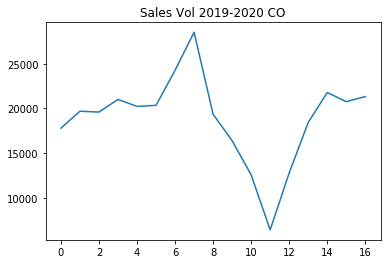

In [26]:
plt.plot(month_sales['index'],month_sales['Volumen'])
plt.title('Sales Vol 2019-2020 CO')
plt.show()

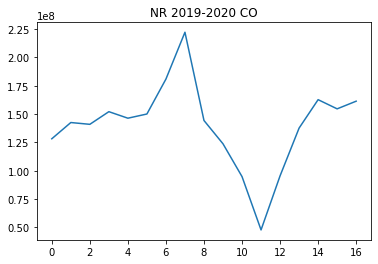

In [27]:
plt.plot(month_sales['index'],month_sales['nr'])
plt.title('NR 2019-2020 CO')
plt.show()

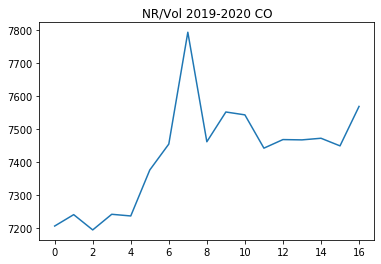

In [28]:
plt.plot(month_sales['index'],month_sales['NR/Vol'])
plt.title('NR/Vol 2019-2020 CO')
plt.show()

Sales decreased a lot due to the COVID aoutbreak. The prices have been increased since last year

## Other Info

In [29]:
len(sales.Cliente.unique())

17009

In [30]:
len(test.Cliente.unique())

9302

# 4) Data Preprocessing

In [31]:
products_to_score['Llave']=products_to_score.Marca2+products_to_score.Cupo2+products_to_score.CapacidadEnvase

In [32]:
products['Llave']=products.Marca2+products.Cupo2+products.CapacidadEnvase2

In [33]:
products_to_score=products_to_score.merge(products[['Llave','product_id']],how='left',on='Llave')
products_to_score=products_to_score.merge(products[['product_id','SegmentoPrecio2']],how='left',on='product_id')
products_to_score

,ID,Marca2,Cupo2,CapacidadEnvase,Llave,product_id,SegmentoPrecio2
0,1,Marca_20,Cupo_3,CapacidadEnvase_9,Marca_20Cupo_3CapacidadEnvase_9,42,SegmentoPrecio_1
1,2,Marca_16,Cupo_2,CapacidadEnvase_10,Marca_16Cupo_2CapacidadEnvase_10,26,SegmentoPrecio_2
2,3,Marca_9,Cupo_3,CapacidadEnvase_12,Marca_9Cupo_3CapacidadEnvase_12,102,SegmentoPrecio_3
3,4,Marca_38,Cupo_2,CapacidadEnvase_10,Marca_38Cupo_2CapacidadEnvase_10,69,SegmentoPrecio_1
4,5,Marca_39,Cupo_2,CapacidadEnvase_10,Marca_39Cupo_2CapacidadEnvase_10,70,SegmentoPrecio_3


In [34]:
test.head()

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,NaN,NaN,NaN,NaN,NaN
1,12,NaN,NaN,NaN,NaN,NaN
2,14,NaN,NaN,NaN,NaN,NaN
3,15,NaN,NaN,NaN,NaN,NaN
4,18,NaN,NaN,NaN,NaN,NaN


In [35]:
test=test.drop(['Marca1','Marca2','Marca3','Marca_Inno1','Marca_Inno2'],axis=1)
test['Año']=2020
test['Mes']=10
test['Volumen']=0
test['nr']=0
test['NR/Vol']=0
test.head()

,Cliente,Año,Mes,Volumen,nr,NR/Vol
0,10,2020,10,0,0,0
1,12,2020,10,0,0,0
2,14,2020,10,0,0,0
3,15,2020,10,0,0,0
4,18,2020,10,0,0,0


In [36]:
test1=test.copy()
test2=test.copy()
test3=test.copy()
test4=test.copy()
test5=test.copy()

In [37]:
test1['product_id']=42
test2['product_id']=26
test3['product_id']=102
test4['product_id']=69
test5['product_id']=70

In [38]:
test=test1.append([test2,test3,test4,test5])
test.shape

(46510, 7)

In [39]:
test=test.merge(products,how='left',on='product_id')
test.head()

,Cliente,Año,Mes,Volumen,nr,NR/Vol,product_id,Marca2,Cupo2,CapacidadEnvase2,SegmentoPrecio2,Llave
0,10,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
1,12,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
2,14,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
3,15,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
4,18,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9


In [40]:
test=test.drop('Llave',axis=1)

In [41]:
sales.columns

Index(['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol'],
      dtype='object')

In [46]:
sales['Llave']=sales.Marca2+sales.Cupo2+sales.CapacidadEnvase2
sales=sales.merge(products[['Llave','product_id']],how='left',on='Llave')
sales.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,NR/Vol,Llave,product_id
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,8022.276248,Marca_1Cupo_1CapacidadEnvase_12,0
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,6863.977158,Marca_2Cupo_2CapacidadEnvase_10,39
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,8273.192177,Marca_3Cupo_2CapacidadEnvase_10,59
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,5114.813411,Marca_1Cupo_2CapacidadEnvase_16,4
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,5715.603808,Marca_4Cupo_2CapacidadEnvase_10,74


In [47]:
sales=sales.drop('Llave',axis=1)

In [48]:
df=sales.append(test,sort=False)

In [49]:
df.shape

(1452618, 12)

In [50]:
df.columns

Index(['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol', 'product_id'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452618 entries, 0 to 46509
Data columns (total 12 columns):
Año                 1452618 non-null int64
Mes                 1452618 non-null int64
Cliente             1452618 non-null int64
SegmentoPrecio2     1452618 non-null object
Marca2              1452618 non-null object
Cupo2               1452618 non-null object
CapacidadEnvase2    1452618 non-null object
Volumen             1452618 non-null float64
disc                1406108 non-null float64
nr                  1452618 non-null float64
NR/Vol              1452618 non-null float64
product_id          1452618 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 144.1+ MB


In [52]:
df=df.merge(customers,how='left',on='Cliente')
df.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,NR/Vol,product_id,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,8022.276248,0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,6863.977158,39,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,8273.192177,59,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,5114.813411,4,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,5715.603808,74,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1


In [53]:
month_sales['Llave']=month_sales['Año'].astype(str)+'-'+month_sales['Mes'].astype(str)
df['Llave']=df['Año'].astype(str)+'-'+df['Mes'].astype(str)
df=df.merge(month_sales[['Llave','index']],how='left',on='Llave')
df.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,NR/Vol,product_id,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Llave,index
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,8022.276248,0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,6863.977158,39,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,8273.192177,59,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,5114.813411,4,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,5715.603808,74,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0


In [54]:
df.columns

Index(['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol', 'product_id',
       'Regional2', 'Gerencia2', 'SubCanal2', 'Categoria', 'Nevera', 'Llave',
       'index'],
      dtype='object')

In [55]:
df.columns=['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol', 'product_id',
       'Regional2', 'Gerencia2', 'SubCanal2', 'Categoria', 'Nevera', 'Llave',
       'period']

In [56]:
df=df.drop('Llave',axis=1)